In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
import scipy.io as scio
from scipy.io import savemat
from sklearn.preprocessing import StandardScaler
import shap
shap.initjs()

In [2]:
data = pd.read_csv(r"D:\warning\Data\Python_mechine learning\污染物预测3.0\原始数据_去除缺失值_中位数填补_去除国家_test.csv")
x = data.drop(columns = ['Pollutant'])
y = data['Pollutant']
#回归性能分析图
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

reg = XGBRegressor(n_estimators=100,    # 增加到100-1000
                   learning_rate=0.3,    # 典型值：0.01-0.3
                   max_depth=4,          # 典型值：3-8
                   subsample=1,        # 防止过拟合
                   colsample_bytree=0.8, # 防止过拟合
                   gamma=0.013,              # 初始可设为0
                   random_state=42
                  ) 
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.9538797450349779

D:\Anaconda\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  pl.tight_layout()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


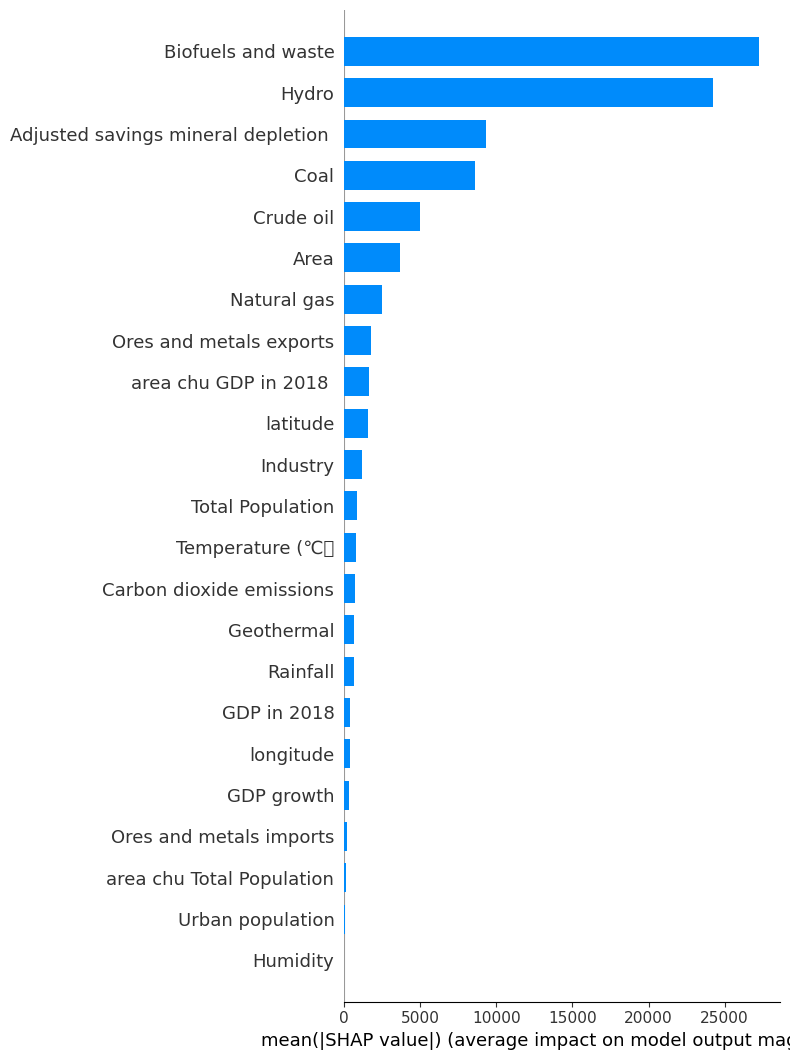

In [3]:
# SHAP分析
# 创建SHAP解释器
explainer = shap.TreeExplainer(reg)

# 计算SHAP值
shap_values = explainer.shap_values(x_train)

# 可视化 SHAP 值
shap.summary_plot(shap_values, x_train, plot_type="bar", max_display=24)

In [4]:
# 将 SHAP 值转换为 DataFrame
shap_df = pd.DataFrame(shap_values, columns=x_train.columns)

# 计算特征重要性
feature_importance = pd.DataFrame({
    "Feature": x_test.columns,
    "Mean_SHAP_Value": np.abs(shap_df).mean(axis=0)
})

# 打印特征重要性
print("Feature Importance:")
print(feature_importance.sort_values(by="Mean_SHAP_Value", ascending=False))

Feature Importance:
                                                                 Feature  \
Biofuels and waste                                    Biofuels and waste   
Hydro                                                              Hydro   
Adjusted savings mineral depletion   Adjusted savings mineral depletion    
Coal                                                                Coal   
Crude oil                                                      Crude oil   
Area                                                                Area   
Natural gas                                                  Natural gas   
Ores and metals exports                          Ores and metals exports   
area chu GDP in 2018                               area chu GDP in 2018    
latitude                                                        latitude   
Industry                                                        Industry   
Total Population                                        Total Popula

In [8]:
# 将特征重要性保存为 CSV 文件
output_path = r"D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\Mean_SHAP_Value_train.csv"
feature_importance.sort_values(by="Mean_SHAP_Value", ascending=False).to_csv(output_path, index=False)

print(f"特征重要性已保存至: {output_path}")

特征重要性已保存至: D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\Mean_SHAP_Value_train.csv


D:\Anaconda\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  pl.tight_layout()
C:\Users\25652\AppData\Local\Temp\ipykernel_19252\3585264709.py:4: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.savefig(output_png_path, bbox_inches='tight', dpi=600)  # 保存图片为 PNG 格式


SHAP 散点图已保存至: D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\shap_summary_scatter_plot__mean_train.png


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


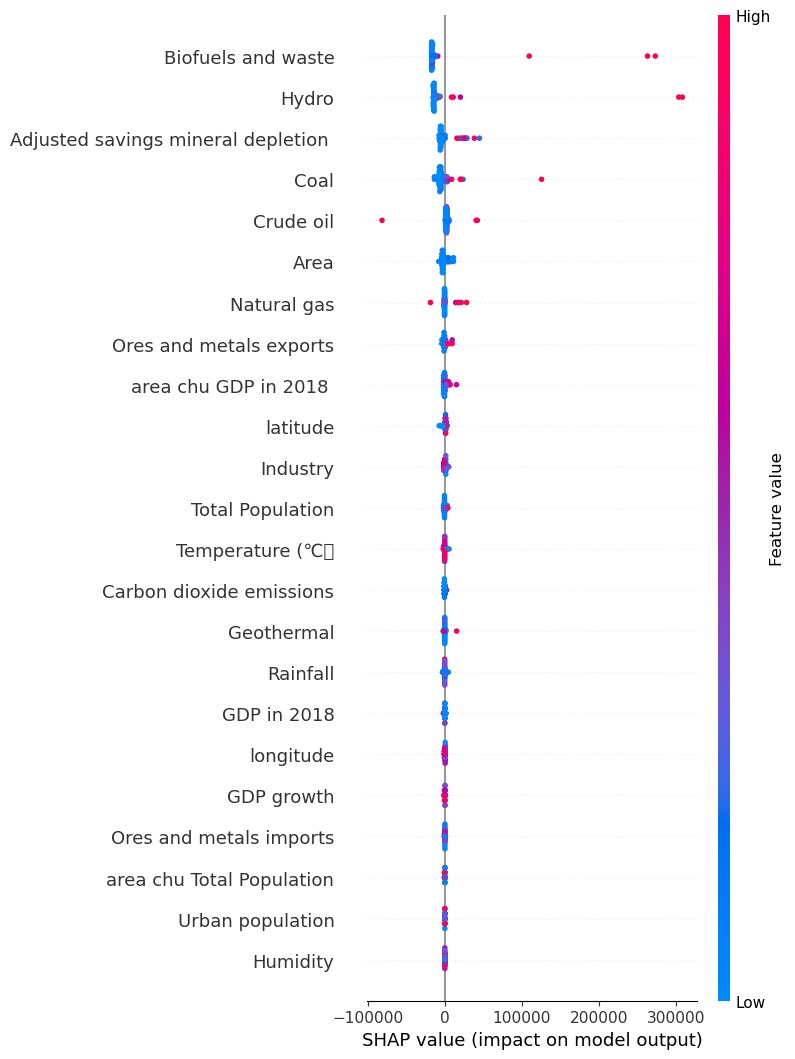

In [20]:
output_png_path = r"D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\shap_summary_scatter_plot__mean_train.png"
plt.figure()
shap.summary_plot(shap_values, x_train, show=False, max_display=24)  # 默认绘制散点图
plt.savefig(output_png_path, bbox_inches='tight', dpi=600)  # 保存图片为 PNG 格式
print(f"SHAP 散点图已保存至: {output_png_path}")

In [18]:
shap_output_path = r"D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\SHAP_values.csv"
shap_df.to_csv(shap_output_path, index=False)
print(f"SHAP 值数据已保存至: {shap_output_path}")

SHAP 值数据已保存至: D:\warning\Data\Python_mechine learning\污染物预测3.0\shap_values\SHAP_values.csv
